In [184]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [185]:
# Load dataset
data = load_iris()

# Get features and target
X=data.data
y=data.target

In [186]:
# Get dummy variable 
y = pd.get_dummies(y).values

In [187]:
#Split data into train and test data
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [225]:
# read data from files
tra = pd.read_csv("optdigits.tra",header=None)
x_train = tra.values[:,:64]
y_training = tra.values[:,-1]

tes = pd.read_csv("optdigits.tes",header=None)
x_test = tes.values[:,:64]
y_testing = tes.values[:,-1]

y_train = pd.get_dummies(y_training).values
y_test = pd.get_dummies(y_testing).values

In [226]:
print(x_train[:10])
print(y_train[:10])

[[ 0  1  6 15 12  1  0  0  0  7 16  6  6 10  0  0  0  8 16  2  0 11  2  0
   0  5 16  3  0  5  7  0  0  7 13  3  0  8  7  0  0  4 12  0  1 13  5  0
   0  0 14  9 15  9  0  0  0  0  6 14  7  1  0  0]
 [ 0  0 10 16  6  0  0  0  0  7 16  8 16  5  0  0  0 11 16  0  6 14  3  0
   0 12 12  0  0 11 11  0  0 12 12  0  0  8 12  0  0  7 15  1  0 13 11  0
   0  0 16  8 10 15  3  0  0  0 10 16 15  3  0  0]
 [ 0  0  8 15 16 13  0  0  0  1 11  9 11 16  1  0  0  0  0  0  7 14  0  0
   0  0  3  4 14 12  2  0  0  1 16 16 16 16 10  0  0  2 12 16 10  0  0  0
   0  0  2 16  4  0  0  0  0  0  9 14  0  0  0  0]
 [ 0  0  0  3 11 16  0  0  0  0  5 16 11 13  7  0  0  3 15  8  1 15  6  0
   0 11 16 16 16 16 10  0  0  1  4  4 13 10  2  0  0  0  0  0 15  4  0  0
   0  0  0  3 16  0  0  0  0  0  0  1 15  2  0  0]
 [ 0  0  5 14  4  0  0  0  0  0 13  8  0  0  0  0  0  3 14  4  0  0  0  0
   0  6 16 14  9  2  0  0  0  4 16  3  4 11  2  0  0  0 14  3  0  4 11  0
   0  0 10  8  4 11 12  0  0  0  4 12 14  7  0  0]
 [ 0 

In [264]:
# Initialize variables
learning_rate = 0.1
learning_rate1 = 5
learning_rate2 = 5
iterations = 1000
N = y_train.size

# number of input features
input_size = 64

# number of hidden layers neurons
hidden_size = 2

# number of neurons at the output layer
output_size = 64

results = pd.DataFrame(columns=["mse", "accuracy"])

In [265]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=1, size=(input_size, hidden_size))  

B1 = np.random.normal(scale=0.5,size=(input_size,))

# initializing weight for the output layer
W2 = np.random.normal(scale=1, size=(hidden_size , output_size)) 
B2 = np.random.normal(scale=0.5,size=(input_size,))

In [266]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [267]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(x_train, W1)
    A1 = sigmoid(Z1)
    # A1 = Z1
    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    # A2 = Z2
    
    # Calculating error
    mse = mean_squared_error(A2, x_train)
    acc = accuracy(A2, x_train)
    try:
        results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    except Exception as e:
        # print(e)
        pass

    # backpropagation
    E1 = A2 - sigmoid(x_train)
    dW1 = E1 * A2 * (1 - A2)
    # print(dW1.shape)
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)
    # print(dW2.shape)
    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(x_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate* W1_update

/tmp/ipykernel_2297/2526325166.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/tmp/ipykernel_2297/2526325166.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/tmp/ipykernel_2297/2526325166.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/tmp/ipykernel_2297/2526325166.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/tmp/ipykernel_2297/2526

<AxesSubplot:title={'center':'Mean Squared Error'}>

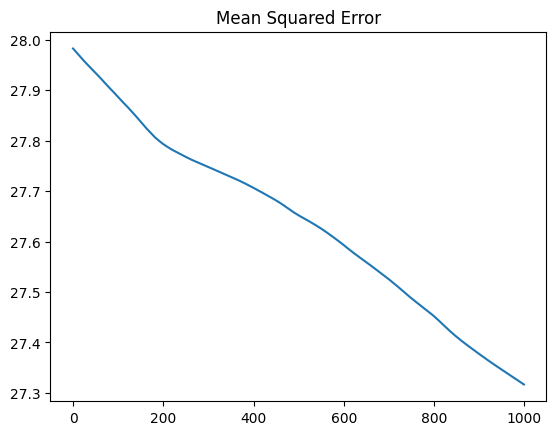

In [268]:
results.mse.plot(title="Mean Squared Error")

<AxesSubplot:title={'center':'Accuracy'}>

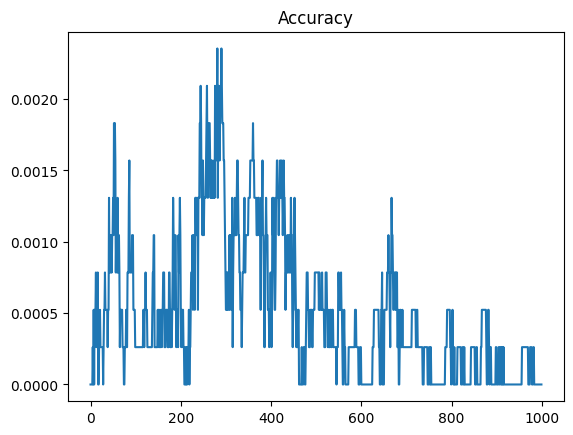

In [269]:
results.accuracy.plot(title="Accuracy")

In [262]:
# feedforward
Z1 = np.dot(x_train, W1)
A1 = sigmoid(Z1)


Z2 = np.dot(A1, W2)
A2 = Z2

acc = accuracy(A2, x_train)
print("Accuracy: {}".format(acc))

Accuracy: 0.0


In [212]:
#print(sigmoid(x_train[:10]))
print(np.exp(-x_train[:10]))

[[1.00000000e+00 3.67879441e-01 2.47875218e-03 3.05902321e-07
  6.14421235e-06 3.67879441e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00 9.11881966e-04 1.12535175e-07 2.47875218e-03
  2.47875218e-03 4.53999298e-05 1.00000000e+00 1.00000000e+00
  1.00000000e+00 3.35462628e-04 1.12535175e-07 1.35335283e-01
  1.00000000e+00 1.67017008e-05 1.35335283e-01 1.00000000e+00
  1.00000000e+00 6.73794700e-03 1.12535175e-07 4.97870684e-02
  1.00000000e+00 6.73794700e-03 9.11881966e-04 1.00000000e+00
  1.00000000e+00 9.11881966e-04 2.26032941e-06 4.97870684e-02
  1.00000000e+00 3.35462628e-04 9.11881966e-04 1.00000000e+00
  1.00000000e+00 1.83156389e-02 6.14421235e-06 1.00000000e+00
  3.67879441e-01 2.26032941e-06 6.73794700e-03 1.00000000e+00
  1.00000000e+00 1.00000000e+00 8.31528719e-07 1.23409804e-04
  3.05902321e-07 1.23409804e-04 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 2.47875218e-03 8.31528719e-07
  9.11881966e-04 3.67879441e-01 1.00000000e+00 1.00000000e+00]
 [1.000

[[4.88219539e-54 7.04288124e-09]
 [1.47690309e-58 1.69636074e-13]
 [1.05027036e-51 1.00000000e+00]
 [2.05726036e-29 1.00000000e+00]
 [3.89403992e-33 9.99458482e-01]
 [1.15781468e-30 1.00000000e+00]
 [2.60061312e-38 1.00000000e+00]
 [7.68586479e-16 1.00000000e+00]
 [1.68959511e-57 9.99997606e-01]
 [4.01657611e-33 1.00000000e+00]
 [4.37753426e-48 1.00000000e+00]
 [1.92042939e-14 1.00000000e+00]
 [9.42237098e-43 1.00000000e+00]
 [8.25679336e-20 1.00000000e+00]
 [1.21599274e-29 1.00000000e+00]
 [9.32698637e-50 5.36946647e-15]
 [6.35690865e-36 1.00000000e+00]
 [7.52563165e-40 1.00000000e+00]
 [2.28951439e-44 1.00000000e+00]
 [8.61727396e-33 1.00000000e+00]
 [2.48921520e-64 1.00000000e+00]
 [8.66338254e-47 1.00000000e+00]
 [6.59006939e-34 1.00000000e+00]
 [5.00155242e-28 1.00000000e+00]
 [5.58388793e-05 1.00000000e+00]
 [5.05655054e-26 1.00000000e+00]
 [9.80990327e-54 1.15560415e-02]
 [2.28945977e-40 1.00000000e+00]
 [5.72156655e-06 1.00000000e+00]
 [1.18345070e-41 1.00000000e+00]
 [7.137527

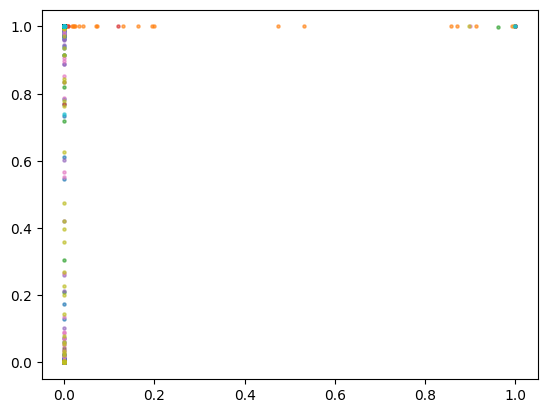

In [270]:

print(A1[:100,:])
for i in range(0,10):
    x = A1[y_training == i]
    plt.scatter(x[:, 0], x[:, 1 ],alpha=0.6,s=5)

plt.show()

In [235]:
print(y_test[:10])
print(A2[:10])

[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
[[ 0.05863509  0.27399801  2.35363168  3.5694433   3.5647261   2.37839612
   0.70978784 -0.92080393  0.96723171  1.86727807  3.47918685  3.7394199
   3.20171179  0.13606359  1.80609971 -0.63783784 -0.75179908  1.44550827
   2.98390813  3.05074474  3.07245138  3.17619403  1.04942331  0.04530255
  -0.56886716  2.37892857  3.27880479  3.46652388  3.11820228  3.31036169
   2.23108574 -4.51366551  0.84420234  1.27669842  2.93732892  3.28232742
   3.03432698  3.03468305  0.73329754 -0.55855132  0.01156459  0.45916228
   2.14847824  3.12192555  3.1701464   3.09939747  1.04558836  0.32095684
  -1.57870491  1.16279639  2.86194958  2.94905138  2.67293828  3.08458078
   2.49047689 -1.05596988  3.81205379  0.95842811  2.64635672  3.49611533
   3.30777292  3.12676604  1.4